In [41]:
from community_knapsack import *
from evaluation import evaluation
import random

In [42]:
# The algorithms to use for this evaluation:
exact_algorithms = [
    PBMultiAlgorithm.MEMOIZATION,
    PBMultiAlgorithm.ILP_SOLVER
]

approximation_algorithms = [
    PBMultiAlgorithm.GREEDY,
    PBMultiAlgorithm.RATIO_GREEDY,
    PBMultiAlgorithm.BRANCH_AND_BOUND,
    PBMultiAlgorithm.SIMULATED_ANNEALING,
    PBMultiAlgorithm.GENETIC_ALGORITHM
]

In [43]:
# The boundaries of this evaluation:

# We test between one and ten dimensions where each budget is randomly generated
# between 10 and 1000 and the cost of each project in a dimension must be within
# 5-50% of the budget in that dimension.

random.seed(181)

start_num_projects = 50
end_num_projects = 250
step_num_projects = 5

num_voters = 3000
dimensions = 5

budget = [random.randint(1_000, 100_000) for _ in range(dimensions)]
cost_bounds = [
    (int(b * 0.05), int(b * 0.4))
    for bid, b in enumerate(budget)
]

In [44]:
x_axis = list(range(start_num_projects, end_num_projects + 1, step_num_projects))

In [45]:
problems = evaluation.generate_multi_problems(
    num_project_bounds=[(p, p) for p in x_axis],
    num_voters_bounds=[(num_voters, num_voters)],
    dimension_bounds=[1],
    budget_bounds=[[[(b, b) for b in budget]]],
    cost_bounds=[[[cost_bound for cost_bound in cost_bounds]]]
)

In [46]:
# Obtain the exact results for this evaluation:
exact_results = evaluation.solve_problems(
    problem_list=problems,
    algorithms=exact_algorithms,
    timeout=120,
    max_fail=1,
    file_name='ext-changing-projects.json',
    output=True
)

Processing MEMOIZATION:
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
Processing ILP_SOLVER:
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


In [48]:
# Obtain the approximation results for this evaluation:
approximation_results = evaluation.solve_problems(
    problem_list=problems,
    algorithms=approximation_algorithms,
    timeout=120,
    max_fail=1,
    file_name='apx-changing-projects.json',
    output=True
)

Processing GREEDY:
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
Processing RATIO_GREEDY:
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
Processing BRANCH_AND_BOUND:
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
Processing SIMULATED_ANNEALING:
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
Processing GENETIC_ALGORITHM:
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


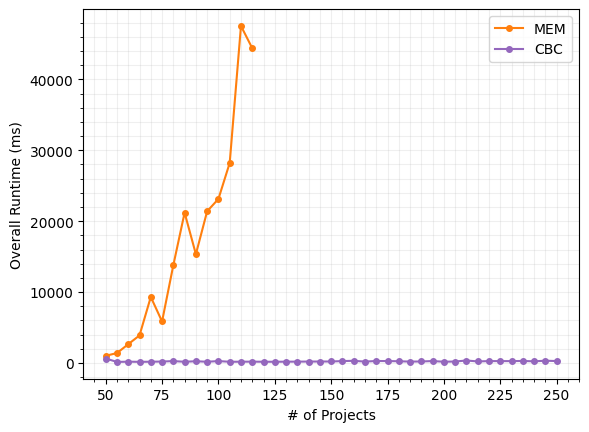

In [49]:
# Plot the exact algorithm runtimes over the problems:
evaluation.plot_2d(
    x_axis=x_axis,
    y_axes=evaluation.get_y_axes(exact_results, exact_algorithms, 2),
    x_label='# of Projects',
    y_label='Overall Runtime (ms)',
    labels=evaluation.get_labels(exact_algorithms),
    colors=evaluation.get_colors(exact_algorithms),
    alphas=evaluation.get_alphas(exact_algorithms),
    sizes=evaluation.get_sizes(exact_algorithms),
)

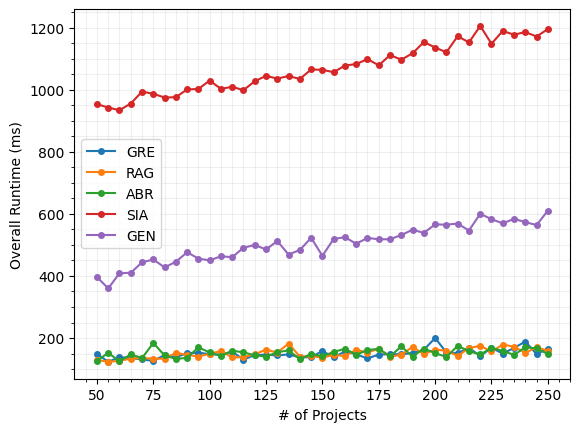

In [51]:
# Plot the approximation algorithm runtimes over the problems:
evaluation.plot_2d(
    x_axis=x_axis,
    y_axes=evaluation.get_y_axes(approximation_results, approximation_algorithms, 2),
    x_label='# of Projects',
    y_label='Overall Runtime (ms)',
    labels=evaluation.get_labels(approximation_algorithms),
    colors=evaluation.get_colors(approximation_algorithms),
    alphas=evaluation.get_alphas(approximation_algorithms),
    sizes=evaluation.get_sizes(approximation_algorithms)
)

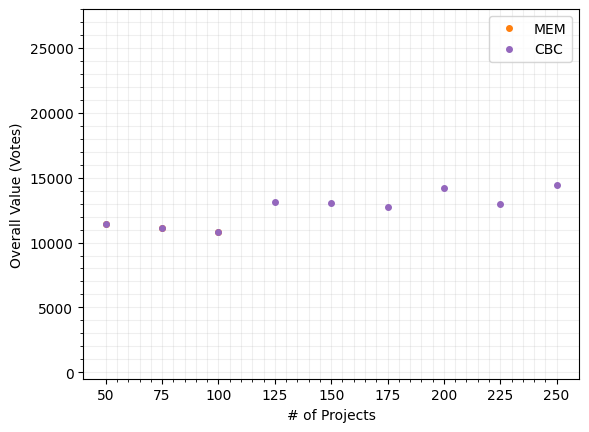

In [52]:
# Plot the approximation vs. exact algorithm values over the problems:
evaluation.plot_2d(
    x_axis=x_axis,
    y_axes=evaluation.get_y_axes(exact_results, exact_algorithms, 0),
    filter_x=5,
    x_label='# of Projects',
    y_label='Overall Value (Votes)',
    marker='o',
    labels=evaluation.get_labels(exact_algorithms),
    colors=evaluation.get_colors(exact_algorithms),
    alphas=evaluation.get_alphas(exact_algorithms),
    sizes=evaluation.get_sizes(exact_algorithms),
    fix_y=(-500, 28000),
    x_tick_minor=True,
    x_ticks=[x for _, x in enumerate(x_axis) if x % 5 == 0]
)

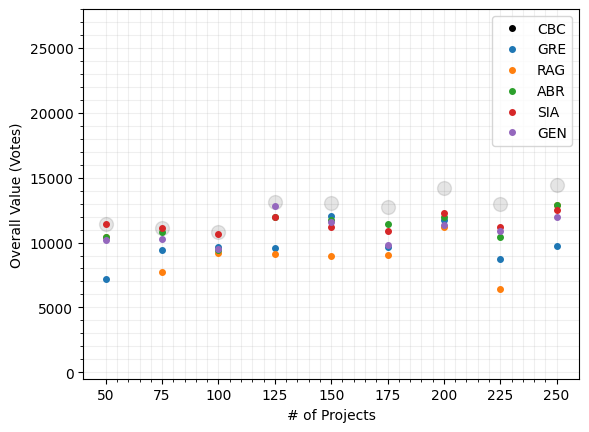

In [53]:
# Plot the approximation vs. exact algorithm values over the problems:
evaluation.plot_2d(
    x_axis=x_axis,
    y_axes=[evaluation.get_y_axis(exact_results, PBSingleAlgorithm.ILP_SOLVER, 0)] + evaluation.get_y_axes(approximation_results, approximation_algorithms, 0),
    filter_x=5,
    x_label='# of Projects',
    y_label='Overall Value (Votes)',
    marker='o',
    labels=['CBC'] + evaluation.get_labels(approximation_algorithms),
    colors=['black'] + evaluation.get_colors(approximation_algorithms),
    alphas=[0.1] + evaluation.get_alphas(approximation_algorithms),
    sizes=[10] + evaluation.get_sizes(approximation_algorithms),
    fix_y=(-500, 28000),
    x_tick_minor=True,
    x_ticks=[x for _, x in enumerate(x_axis) if x % 5 == 0]
)